### **Applying Decesion Trees Algorithm for past hires dataset**

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv(r'C:\Users\Karth\Downloads\Machine learning\Datasets\PastHires.csv')
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [4]:
df.shape

(13, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Years Experience    13 non-null     int64 
 1   Employed?           13 non-null     object
 2   Previous employers  13 non-null     int64 
 3   Level of Education  13 non-null     object
 4   Top-tier school     13 non-null     object
 5   Interned            13 non-null     object
 6   Hired               13 non-null     object
dtypes: int64(2), object(5)
memory usage: 860.0+ bytes


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Years Experience,13.0,5.153846,6.348834,0.0,0.0,3.0,7.0,20.0
Previous employers,13.0,1.769231,2.006400,0.0,0.0,1.0,2.0,6.0


In [7]:
df.isnull().sum()

Years Experience      0
Employed?             0
Previous employers    0
Level of Education    0
Top-tier school       0
Interned              0
Hired                 0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
numerical= df.select_dtypes(exclude='object').columns.tolist()
numerical

['Years Experience', 'Previous employers']

In [10]:
categorical= df.select_dtypes(include='object').columns.tolist()
categorical

['Employed?', 'Level of Education', 'Top-tier school', 'Interned', 'Hired']

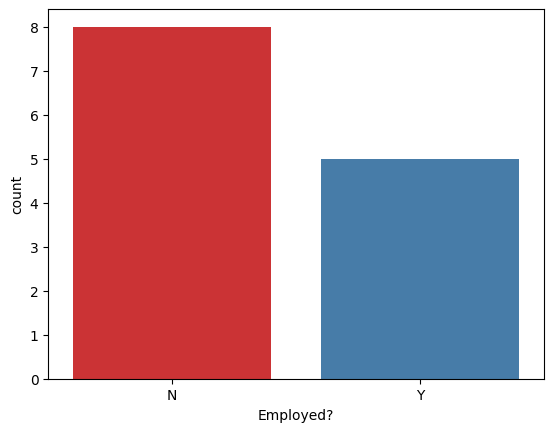

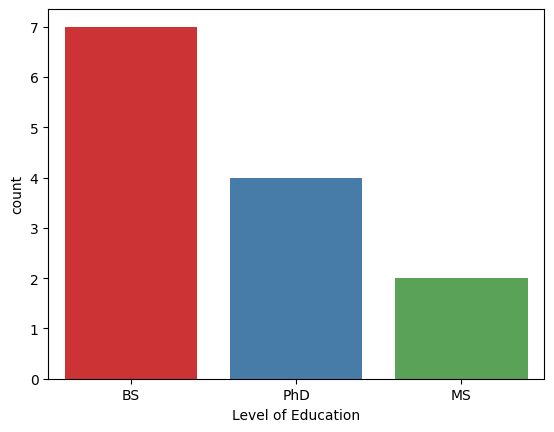

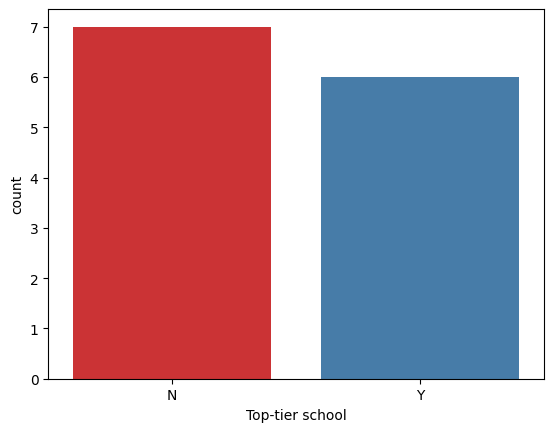

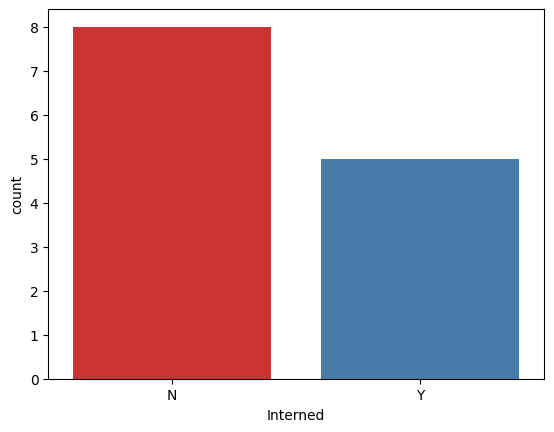

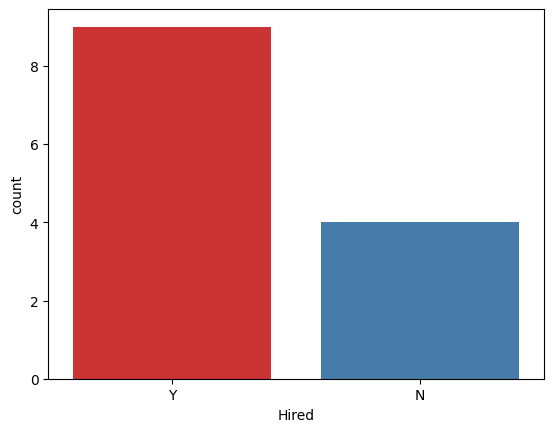

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical:
    sns.countplot(x= col, data=df, order=df[col].value_counts().index, palette='Set1')
    plt.show()

- We need to convert the categorical columns into numerical
- For that we can use Label Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for col in df.columns[:6]:
    df[col]= le.fit_transform(df[col])

df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,7,1,3,0,0,0,Y
1,0,0,0,0,1,1,Y
2,6,0,5,0,0,0,N
3,2,1,1,1,1,0,Y
4,9,0,2,2,1,0,N
5,0,0,0,2,1,1,Y
6,5,1,2,1,0,1,Y
7,3,0,1,0,0,1,Y
8,8,1,4,0,0,0,Y
9,0,0,0,0,0,0,N


**Model Building**

In [13]:
X= df.drop('Hired', axis=1)
y= df['Hired']

In [14]:
X.shape

(13, 6)

In [15]:
y.shape

(13,)

- Split the dataset into training data and testing data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)

In [17]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)

print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (10, 6)
X_test:  (3, 6)
y_train:  (10,)
y_test:  (3,)


In [18]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier(criterion='entropy') ##entropy uses log based measure
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

- Model Prediction

In [19]:
y_pred= model.predict(X_test)
y_pred

array(['Y', 'Y', 'Y'], dtype=object)

In [20]:
y_test

11    Y
9     N
0     Y
Name: Hired, dtype: object

In [21]:
from sklearn.metrics import accuracy_score

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Accuracy Score: 0.6666666666666666


- Let's find the entropy & information gain using formula 

In [22]:
import math

##entropy
def entropy(column):
    counts= column.value_counts()
    probabilities = counts/len(column)
    return -sum(probabilities*probabilities.apply(math.log2))

#Conditional entropy 
def conditional_entropy(data, feature, target):
    feature_values= data[feature].unique()
    weighted_entropy=0

    for value in feature_values:

        subset= data[data[feature]== value]
        weighted_entropy += (len(subset)/len(data))* entropy(subset[target])
    return weighted_entropy 

#Information gain
def information_gain(data, feature, target):
    total_entropy= entropy(data[target])
    feature_conditional_entropy= conditional_entropy(data, feature, target)
    return total_entropy- feature_conditional_entropy

#Information gain for each feature
for feature in X:
    info_gain= information_gain(df, feature, 'Hired')
    print(f'Information Gain for {feature} is: {info_gain}')
    

Information Gain for Years Experience is: 0.6408676019243735
Information Gain for Employed? is: 0.2751070248348759
Information Gain for Previous employers is: 0.23739740978310186
Information Gain for Level of Education is: 0.11804210329899778
Information Gain for Top-tier school is: 0.0019055645046179848
Information Gain for Interned is: 0.2751070248348759


In [23]:
X_train

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
8,8,1,4,0,0,0
5,0,0,0,2,1,1
2,6,0,5,0,0,0
1,0,0,0,0,1,1
12,0,0,0,2,1,0
4,9,0,2,2,1,0
7,3,0,1,0,0,1
10,1,0,1,2,1,0
3,2,1,1,1,1,0
6,5,1,2,1,0,1


In [24]:
import sys
!{sys.executable} -m pip install pydotplus

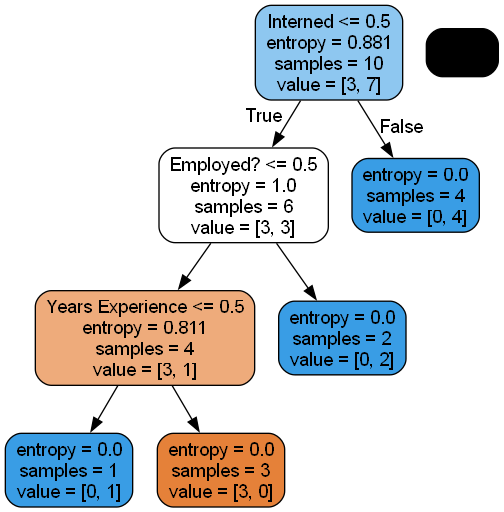

In [25]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(model, out_file=None,
                           feature_names=X_train.columns,
                           filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


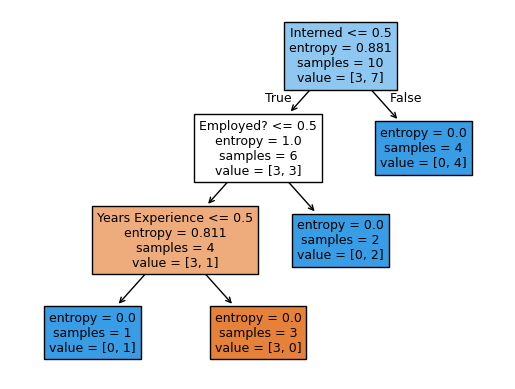

In [26]:
from sklearn import tree
tree.plot_tree(model, feature_names=X_train.columns, filled=True)
plt.show()

In [27]:
##Model evaluation
from sklearn.metrics import accuracy_score, classification_report
accuracy= accuracy_score(y_test, y_pred)*100
classification_report= classification_report(y_test, y_pred)

print("Accuracy: ",accuracy)
print("Classifcatioon report: ", classification_report)

Accuracy:  66.66666666666666
Classifcatioon report:                precision    recall  f1-score   support

           N       0.00      0.00      0.00         1
           Y       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



**New Data Prediction**

In [ ]:
new_data=[[9, 0, 4, 2, 1, 1]]
prediction= model.predict(new_data)
prediction

array(['Y'], dtype=object)

In [29]:
import joblib
joblib.dump(model, 'PastHiresDT.pkl')

['PastHiresDT.pkl']

In [30]:
classified_model= joblib.load('PastHiresDT.pkl')
classified_model

DecisionTreeClassifier(criterion='entropy')

In [31]:
new_data1= [[8, 0,2, 2, 1, 1]]
predict=classified_model.predict(new_data)
predict

array(['Y'], dtype=object)